Pandas Intermediate to Advance

What's covered?
Combining Data From Multiple Tables using pd.merge() Function
how argument
Learning with Two Example DataFrame
Applying Inner Join
Applying Left Join
Applying Right Join
Applying Outer Join
Applying Cross Join
Brief primer on merge methods (relational algebra)
Solving a Case Study by Joining Multiple Tables
Reading .csv Files - customer_data.csv, product_data.csv and purchase_data.csv
Joining Purchase Table with Customer and Product Table
Generating Basic Reports on the Data
Visual Data Analysis using Pandas (Plotting)
Reading .csv File - Iris Data
Histogram Plot
KDE Plot
Box Plot
Vertical and Horizontal Bar Plot
Scatter Plot
Combining Data From Multiple Tables using pd.merge() Function
pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL.

pandas provides a single function, merge(), as the entry point for all standard database join operations between DataFrame or named Series objects:


Question: How to combine data from multiple tables?
Answer: Multiple tables can be concatenated both column wise and row wise as database-like join/merge operations are provided to combine multiple tables of data.

Remember

Multiple tables can be concatenated both column-wise and row-wise using the concat function.
For database-like merging/joining of tables, use the merge function.

Syntax
pd.merge(left, right, how='inner', on=None)

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
left = pd.DataFrame({"key": ["K0", "K1", "K2", "K3"], 
                     "A": ["A0", "A1", "A2", "A3"], 
                     "B": ["B0", "B1", "B2", "B3"]
                    })
print(type(left))
left

<class 'pandas.core.frame.DataFrame'>


,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [3]:
right = pd.DataFrame({"key": ["K0", "K1", "K2", "K3"], 
                      "C": ["C0", "C1", "C2", "C3"], 
                      "D": ["D0", "D1", "D2", "D3"]
                     })

right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [4]:
result = pd.merge(left,right, on='key')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


how argument
The how argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA. Here is a summary of the how options and their SQL equivalent names:

Merge method (how) |	SQL Join Name|	Description	|Important Pointer|

inner	INNER JOIN	Use intersection of keys from both frames	Display matching records from both tables
left	LEFT OUTER JOIN	Use keys from left frame only	Display all records from the left table and matching records from the right table
right	RIGHT OUTER JOIN	Use keys from right frame only	Display all records from the right table and matching records from the left table
outer	FULL OUTER JOIN	Use union of keys from both frames	Keep all the records from both tables
cross	CROSS JOIN	Create the cartesian product of rows of both frames	Cartesian Product

Learning with Two Example DataFrame
Let's consider the two dataframes given below and apply all merge operations:

In [33]:
left = pd.DataFrame({"key1": ["K0", "K0", "K1", "K2"], 
                     "key2": ["K0", "K1", "K0", "K1"], 
                     "A": ["A0", "A1", "A2", "A3"], 
                     "B": ["B0", "B1", "B2", "B3"]
                    })

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [34]:
right = pd.DataFrame({"key1": ["K0", "K1", "K1", "K2"], 
                      "key2": ["K0", "K0", "K0", "K0"], 
                      "C": ["C0", "C1", "C2", "C3"], 
                      "D": ["D0", "D1", "D2", "D3"]
                     })

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [35]:
result = pd.merge(left,right, on=['key1','key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [36]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [30]:
a = pd.DataFrame({
    'key1': ['a','b','c','d'],
    'key2' :['b','c','d','e'],
    'id': [1,2,3,4],
    'id2': [4,5,6,7]
})
a

,key1,key2,id,id2
0,a,b,1,4
1,b,c,2,5
2,c,d,3,6
3,d,e,4,7


In [31]:
b = pd.DataFrame({
    'key1': ['a','b','c','d'],
    'key2' :['b','c','d','e'],
    'id': [4,5,6,7],
    'id2': [1,2,3,4],
})
b

,key1,key2,id,id2
0,a,b,4,1
1,b,c,5,2
2,c,d,6,3
3,d,e,7,4


In [32]:
c = pd.merge(a,b, how='inner', on=['key1','key2'])
c

,key1,key2,id_x,id2_x,id_y,id2_y
0,a,b,1,4,4,1
1,b,c,2,5,5,2
2,c,d,3,6,6,3
3,d,e,4,7,7,4


Applying left join

In [37]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


Applying right join

In [38]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


Applying outer join

In [39]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


Applying Cross join
create the cartesian product of rows of both frames

In [41]:
result = pd.merge(left, right, how="cross")

result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


Brief primer on merge methods (relational algebra)
Experienced users of relational databases like SQL will be familiar with the terminology used to describe join operations between two SQL-table like structures (DataFrame objects). There are several cases to consider which are very important to understand:

one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values).
many-to-one joins: for example when joining an index (unique) to one or more columns in a different DataFrame.
many-to-many joins: joining columns on columns.
It is worth spending some time understanding the result of the many-to-many join case. In SQL / standard relational algebra, if a key combination appears more than once in both tables, the resulting table will have the Cartesian product of the associated data.

Solving a Case Study with merge()
Reading .csv Files - customer_data.csv, product_data.csv and purchase_data.csv

In [42]:
import pandas as pd
import numpy as np

In [43]:
cust_df = pd.read_csv('customer_data.csv')
pur_df = pd.read_csv('purchase_data.csv')
prod_df = pd.read_csv('product_data.csv')

In [45]:
cust_df.head()

,cust_id,cust_name
0,cust_12345,Sally
1,cust_12346,Jenna
2,cust_12347,Eliana
3,cust_12348,Cristen
4,cust_12349,Steve


In [46]:
pur_df.head()

,cust_id,prod_id
0,cust_12345,p_001
1,cust_12346,p_003
2,cust_12347,p_002
3,cust_12348,p_004
4,cust_12349,p_001


In [51]:
prod_df

,prod_id,prod_name
0,p_001,Machine Learning
1,p_002,Data Structures
2,p_003,Full Stack Development
3,p_004,Competitive Programming


Joining Purchase Table, Customer and Product Table

In [53]:
df = pd.merge(pur_df,cust_df, on='cust_id', how='inner')
df.head()

,cust_id,prod_id,cust_name
0,cust_12345,p_001,Sally
1,cust_12346,p_003,Jenna
2,cust_12347,p_002,Eliana
3,cust_12348,p_004,Cristen
4,cust_12349,p_001,Steve


In [57]:
grp = pd.merge(df,prod_df, on='prod_id', how='inner')
grp.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12349,p_001,Steve,Machine Learning
2,cust_12350,p_001,Kelli,Machine Learning
3,cust_12352,p_001,Aretha,Machine Learning
4,cust_12355,p_001,Carla,Machine Learning


In [58]:
grp['prod_name'].unique()

array(['Machine Learning', 'Full Stack Development', 'Data Structures',
       'Competitive Programming'], dtype=object)

In [59]:
grp['prod_name'].value_counts()

prod_name
Machine Learning           9
Data Structures            9
Competitive Programming    6
Full Stack Development     5
Name: count, dtype: int64

In [60]:
grp.keys()

Index(['cust_id', 'prod_id', 'cust_name', 'prod_name'], dtype='object')

In [65]:
group_df = grp.groupby('prod_name')
group_df

In [68]:
group_df.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12349,p_001,Steve,Machine Learning
2,cust_12350,p_001,Kelli,Machine Learning
3,cust_12352,p_001,Aretha,Machine Learning
4,cust_12355,p_001,Carla,Machine Learning
9,cust_12346,p_003,Jenna,Full Stack Development
10,cust_12353,p_003,Pansy,Full Stack Development
11,cust_12359,p_003,Latrisha,Full Stack Development
12,cust_12363,p_003,Shela,Full Stack Development
13,cust_12370,p_003,Angla,Full Stack Development


Generating Basic Reports on the Data

In [71]:
group_df.get_group('Data Structures')

,cust_id,prod_id,cust_name,prod_name
14,cust_12347,p_002,Eliana,Data Structures
15,cust_12350,p_002,Kelli,Data Structures
16,cust_12354,p_002,Jennell,Data Structures
17,cust_12356,p_002,Hiram,Data Structures
18,cust_12357,p_002,Normand,Data Structures
19,cust_12361,p_002,Laureen,Data Structures
20,cust_12363,p_002,Shela,Data Structures
21,cust_12364,p_002,Raye,Data Structures
22,cust_12365,p_002,Vickie,Data Structures


In [72]:
group_df.first()

,cust_id,prod_id,cust_name
prod_name,,,
Competitive Programming,cust_12348,p_004,Cristen
Data Structures,cust_12347,p_002,Eliana
Full Stack Development,cust_12346,p_003,Jenna
Machine Learning,cust_12345,p_001,Sally


In [74]:
group_df.last()

,cust_id,prod_id,cust_name
prod_name,,,
Competitive Programming,cust_12368,p_004,Georgetta
Data Structures,cust_12365,p_002,Vickie
Full Stack Development,cust_12370,p_003,Angla
Machine Learning,cust_12369,p_001,Dung


In [82]:
group_df.nth(3)

,cust_id,prod_id,cust_name,prod_name
3,cust_12352,p_001,Aretha,Machine Learning
12,cust_12363,p_003,Shela,Full Stack Development
17,cust_12356,p_002,Hiram,Data Structures
26,cust_12362,p_004,Trinity,Competitive Programming


In [79]:
group_df.count()

,cust_id,prod_id,cust_name
prod_name,,,
Competitive Programming,6,6,6
Data Structures,9,9,9
Full Stack Development,5,5,5
Machine Learning,9,9,9


In [80]:
group_df.describe()

cust_id                         prod_id                \
                          count unique         top freq   count unique    top   
prod_name                                                                       
Competitive Programming       6      6  cust_12348    1       6      1  p_004   
Data Structures               9      9  cust_12347    1       9      1  p_002   
Full Stack Development        5      5  cust_12346    1       5      1  p_003   
Machine Learning              9      9  cust_12345    1       9      1  p_001   

                             cust_name                         
                        freq     count unique        top freq  
prod_name                                                      
Competitive Programming    6         6      6  Cristen      1  
Data Structures            9         9      9   Eliana      1  
Full Stack Development     5         5      5    Jenna      1  
Machine Learning           9         9      9    Sally      1

In [81]:
group_df.describe(include='all')

cust_id                         prod_id                \
                          count unique         top freq   count unique    top   
prod_name                                                                       
Competitive Programming       6      6  cust_12348    1       6      1  p_004   
Data Structures               9      9  cust_12347    1       9      1  p_002   
Full Stack Development        5      5  cust_12346    1       5      1  p_003   
Machine Learning              9      9  cust_12345    1       9      1  p_001   

                             cust_name                         
                        freq     count unique        top freq  
prod_name                                                      
Competitive Programming    6         6      6  Cristen      1  
Data Structures            9         9      9   Eliana      1  
Full Stack Development     5         5      5    Jenna      1  
Machine Learning           9         9      9    Sally      1

Visual Data Analysis using Pandas (Plotting)
Syntax
DataFrame.plot(kind = "kind")

The kind of plot to produce:

line : line plot (default)
bar : vertical bar plot
barh : horizontal bar plot
hist : histogram
box : boxplot
kde : Kernel Density Estimation plot
density : same as ‘kde’
area : area plot
pie : pie plot
scatter : scatter plot
hexbin : hexbin plot

In [83]:
# Reading weather data
df = pd.read_csv('nyc_weather.csv')
df.head()

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,NaN,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,NaN,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,NaN,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,NaN,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,NaN,333


<Axes: >

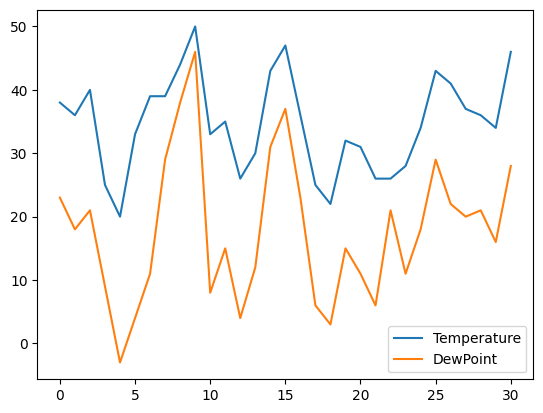

In [86]:
df[['Temperature', 'DewPoint']].plot(kind='line')

<Axes: >

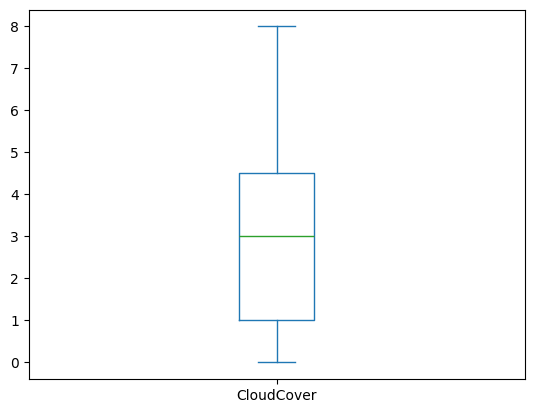

In [87]:
df['CloudCover'].plot(kind='box')